# 🔬 Global `SARS-CoV-2` DNA Sequence Analysis
### 🦠 `3631` Sequences of Covid-19 on GenBank

Downloads avaliable from The National Library of Medicine [NCBI Virus](https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=SARS-CoV-2,+taxid:2697049) resource.
1. Download all `fasta` nulcleotide sequences
2. Download `Current table view` csv for all sequence metadata 

Sequence data also available from the _China National Center for Bioinformation_ [CNCB](https://bigd.big.ac.cn/ncov/release_genome?lang=en#goto)

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 50
%matplotlib inline

from Bio.Seq import Seq
from Bio import SeqIO

#### 1. View NCBI Metadata

In [6]:
df = pd.read_csv('../data/NCBI_sequences_metadata.csv')
df.head(2)

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,complete,NaN,NaN,"Baranov,P.V., Henderson,C.M., Anderson,C.B., G...","15680415, 15630477, 10482585",China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
1,MT459832,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29818,GenBank,complete,NaN,NaN,"Kassela,K., Dovrolis,N., Bampali,M., Gatzidou,...",NaN,Greece: Athens,Homo sapiens,NaN,2020-03-24,NaN,Severe acute respiratory syndrome coronavirus ...


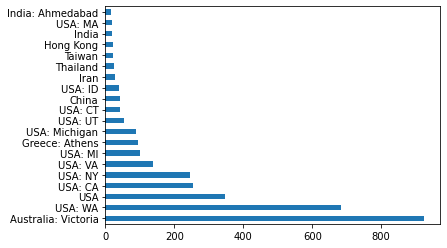

In [7]:
df.Geo_Location.value_counts().head(20).plot(kind='barh')

In [8]:
df.Host.value_counts()

Homo sapiens                3610
Mustela lutreola              13
Canis lupus familiaris         2
Felis catus                    2
Panthera tigris jacksoni       1
Name: Host, dtype: int64

* `Panthera Tigris Jacksoni` is a Malaysian Tiger from the Bronx Zoo in New York  
  
From WCS Newsroom
> On April 5, 2020, we reported that a four-year-old female Malayan tiger had tested positive for COVID-19. We can confirm that the **three other tigers in Tiger Mountain and the three African lions** that exhibited a cough have also **tested positive** for COVID-19.

#### 2. Parse Sequence Records

In [10]:
%%time
data = SeqIO.index("../data/SARS-CoV-2-sequences.fasta", "fasta")
print(f'COVID-19 DNA Sequences: {len(data)}')

COVID-19 DNA Sequences: 3632
CPU times: user 1.31 s, sys: 562 ms, total: 1.88 s
Wall time: 1.91 s


In [11]:
# Get accession
records = list(data)

for i, record in enumerate(records[:3]):
    print(f'\n{i}. \n{data[record].description}')


0. 
NC_045512 |Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1| complete genome

1. 
MT459832 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/GRC/34_36284/2020| complete genome

2. 
MT459833 |Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/GRC/43_35679/2020| complete genome


In [39]:
# Noteworthy records
patient_zero = 'NC_045512'
recent_cali = 'MT460092'
bronx_tiger = 'MT365033'

samples = [patient_zero, recent_cali, bronx_tiger]

data[patient_zero].seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [40]:
data[bronx_tiger].seq

Seq('GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCT...AAA', SingleLetterAlphabet())

In [41]:
df[df.Accession.isin(samples)]

,Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,complete,NaN,NaN,"Baranov,P.V., Henderson,C.M., Anderson,C.B., G...","15680415, 15630477, 10482585",China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
106,MT460092,2020-05-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29857,GenBank,complete,NaN,NaN,"CZB Cliahub Consortium,C.C.C.",NaN,USA: CA,Homo sapiens,NaN,2020-05-01,NaN,Severe acute respiratory syndrome coronavirus ...
2125,MT365033,2020-04-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29897,GenBank,complete,NaN,NaN,"Mitchell,P., Anderson,R.R., Chilson,B., Venugo...",NaN,USA: New York,Panthera tigris jacksoni,"oronasopharynx, oronasopharynx",2020-04-02,NaN,Severe acute respiratory syndrome coronavirus ...


In [15]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter

In [29]:
# DNA to mRNA to Polypeptide (protein)
data[recent_cali].seq.transcribe().translate()

Seq('SQVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVY...NDK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [50]:
for s in samples:
    print(s)
    print(data[s].seq.transcribe().translate()[:100])

NC_045512
IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQREN
MT460092
SQVTNQPTFDLL*ICSLNEL*NLCGCHSAACLVHSRSIINN*LLSLTGHE*LVYLLQAAYGFVRVAADHQHI*VSSGCDRKVRWRALSLVSTRKHTSNSV
MT365033
GLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFCPGVTER*DGEPCPWFQRENTR


In [34]:
data[bronx_tiger].seq.transcribe().translate()

Seq('GLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTS...KKK', HasStopCodon(ExtendedIUPACProtein(), '*'))

### Dot Plots of Opening Sequences

In [56]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

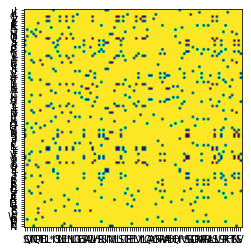

In [59]:
# Plotting function to illustrate deeper matches

def dotplotx(seq1, seq2, n):
    seq1=seq1[0:n]
    seq2=seq2[0:n]
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()
    
dotplotx(data[patient_zero].seq.transcribe().translate(),
         data[recent_cali].seq.transcribe().translate(), n=100)